In [1]:
import pylab as plt
import numpy as np
import pandas as pd
import proposal as pp  #installed with pip
import scipy
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import re
import sys
import glob
from MCEq.core import config, MCEqRun
import crflux.models as crf
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import random
try:
    import cPickle as pickle
except ImportError:
    import pickle
from scipy.interpolate import interp2d, NearestNDInterpolator,LinearNDInterpolator

In [2]:
def get_color(n, colormax, cmap="PiYG"):
    
    this_cmap = plt.get_cmap(cmap)
    return this_cmap(n/colormax)

CLRS=["gray","firebrick","orchid","deepskyblue","orange","blueviolet","magenta","limegreen","pink","tomato","red","black","yellow","darkgreen"]

energies=[100,250,500,750,1000,1500,2000,3000,4000,5000,6000,7500,8500,10000,11000,12500,15000,20000,25000]
GeV=1000

NumToRun=1000

AreaOfNextNEW=np.pi*(45/2)**2*66 #cm^2 but these dimensions need double checked

In [13]:
#importing Proposal Outputs
r=0

for files in glob.glob('./MCeQdataPlusProposal/ProposalOutputs/ProposalMuons*.h5'):
    #print (files)
    run=re.search('Muons(.*)_', files)
    X=str(run.group(1))
    run=re.search('_(.*).h5', files)
    Y=str(run.group(1))
    if r==0:
        musDatamtn=pd.read_hdf(files)
        musDatamtn['X']=    X
        musDatamtn['Y']=    Y        
        r+=1
    else:
        df=pd.read_hdf(files)
        df['X']=    X
        df['Y']=    Y  
        musDatamtn=musDatamtn.append(df, ignore_index=True)

        
musDatamtn['X'] = musDatamtn['X'].astype(float)        
musDatamtn['Y'] = musDatamtn['Y'].astype(float)          


musDatamtn['Theta']=np.rad2deg(musDatamtn['Theta'])
musDatamtn['Theta']=np.where(musDatamtn['Theta'] <0,musDatamtn['Theta']+180,musDatamtn['Theta'])

musDatamtn=musDatamtn[(musDatamtn.X!=-505)&(musDatamtn.X!=-405)&(musDatamtn.X!=295)]

kX=musDatamtn.X.unique()
kX.sort()
lY=musDatamtn.Y.unique()
lY.sort()
energies=musDatamtn.Energy.unique()
energies.sort()

print(kX,lY,energies)

[-305. -205. -105.   -5.   95.  195.  395.  495.  595.  695.  795.  895.
  995. 1095. 1195. 1295. 1395. 1495.] [-2255. -2155. -2055. -1955. -1855. -1755. -1655. -1555. -1455. -1355.
 -1255. -1155. -1055.  -955.  -855.  -755.  -655.  -555.  -455.  -355.
  -255.  -155.   -55.    45.   145.   245.   345.   445.   545.   645.
   745.] [  100000   250000   500000   750000  1000000  1500000  2000000  3000000
  4000000  5000000  6000000  7500000  8500000 10000000 11000000 12500000
 15000000 20000000 25000000]


In [14]:
#save interpolatations for proposal output for all X,Y for each energy
for LOC in range(0,len(energies)):
    r=0
    Xs=[]
    Ys=[]
    Percs=[]

    NRG=energies[LOC]*GeV



    for X in kX:
        for Y in lY:
            percsum=0
            multi=0
            if len(musDatamtn[(musDatamtn.X==X)&(musDatamtn.Y==Y)])==0:
                Xs.append(X)
                print("missing",X,Y)
                Percs.append(0) #need to rerun anything missing
                Ys.append(Y)
                continue
            if len(musDatamtn[(musDatamtn.X==X)&(musDatamtn.Y==Y)].FinalMuons.iloc[LOC]) <=0:
                perc=0
            else:
                perc=len(musDatamtn[(musDatamtn.X==X)&(musDatamtn.Y==Y)].FinalMuons.iloc[LOC])/NumToRun
            Xs.append(X)
            Percs.append(perc)
            Ys.append(Y)


    df=pd.DataFrame(Xs, columns = ['X'])
    df['Y']=Ys
    df['perc']=Percs

    percsarray=np.array(df.perc)
    percsarray = percsarray.reshape(len(df.X.unique()), len(df.Y.unique()))
    PercentMuons=scipy.interpolate.RectBivariateSpline(np.unique(df.X),np.unique(df.Y),percsarray,s=0,kx=3, ky=3)

    with open('./MCeQdataPlusProposal/ProposalInterpolators/Proposal_Muons_interpolator'+str(NRG)+'TeV.pkl', 'wb') as f:
        pickle.dump(PercentMuons, f)

missing 1295.0 -1555.0
missing 1295.0 -1455.0
missing 1295.0 -1355.0
missing 1295.0 -1255.0
missing 1295.0 -1155.0
missing 1295.0 -1055.0
missing 1295.0 -955.0
missing 1295.0 -855.0
missing 1295.0 -755.0
missing 1295.0 -655.0
missing 1295.0 -555.0
missing 1295.0 -455.0
missing 1295.0 -355.0
missing 1295.0 -255.0
missing 1295.0 -155.0
missing 1295.0 -55.0
missing 1295.0 45.0
missing 1295.0 145.0
missing 1295.0 245.0
missing 1295.0 345.0
missing 1295.0 445.0
missing 1295.0 545.0
missing 1295.0 645.0
missing 1295.0 745.0
missing 1295.0 -1555.0
missing 1295.0 -1455.0
missing 1295.0 -1355.0
missing 1295.0 -1255.0
missing 1295.0 -1155.0
missing 1295.0 -1055.0
missing 1295.0 -955.0
missing 1295.0 -855.0
missing 1295.0 -755.0
missing 1295.0 -655.0
missing 1295.0 -555.0
missing 1295.0 -455.0
missing 1295.0 -355.0
missing 1295.0 -255.0
missing 1295.0 -155.0
missing 1295.0 -55.0
missing 1295.0 45.0
missing 1295.0 145.0
missing 1295.0 245.0
missing 1295.0 345.0
missing 1295.0 445.0
missing 1295.0 

missing 1295.0 -1555.0
missing 1295.0 -1455.0
missing 1295.0 -1355.0
missing 1295.0 -1255.0
missing 1295.0 -1155.0
missing 1295.0 -1055.0
missing 1295.0 -955.0
missing 1295.0 -855.0
missing 1295.0 -755.0
missing 1295.0 -655.0
missing 1295.0 -555.0
missing 1295.0 -455.0
missing 1295.0 -355.0
missing 1295.0 -255.0
missing 1295.0 -155.0
missing 1295.0 -55.0
missing 1295.0 45.0
missing 1295.0 145.0
missing 1295.0 245.0
missing 1295.0 345.0
missing 1295.0 445.0
missing 1295.0 545.0
missing 1295.0 645.0
missing 1295.0 745.0
missing 1295.0 -1555.0
missing 1295.0 -1455.0
missing 1295.0 -1355.0
missing 1295.0 -1255.0
missing 1295.0 -1155.0
missing 1295.0 -1055.0
missing 1295.0 -955.0
missing 1295.0 -855.0
missing 1295.0 -755.0
missing 1295.0 -655.0
missing 1295.0 -555.0
missing 1295.0 -455.0
missing 1295.0 -355.0
missing 1295.0 -255.0
missing 1295.0 -155.0
missing 1295.0 -55.0
missing 1295.0 45.0
missing 1295.0 145.0
missing 1295.0 245.0
missing 1295.0 345.0
missing 1295.0 445.0
missing 1295.0 

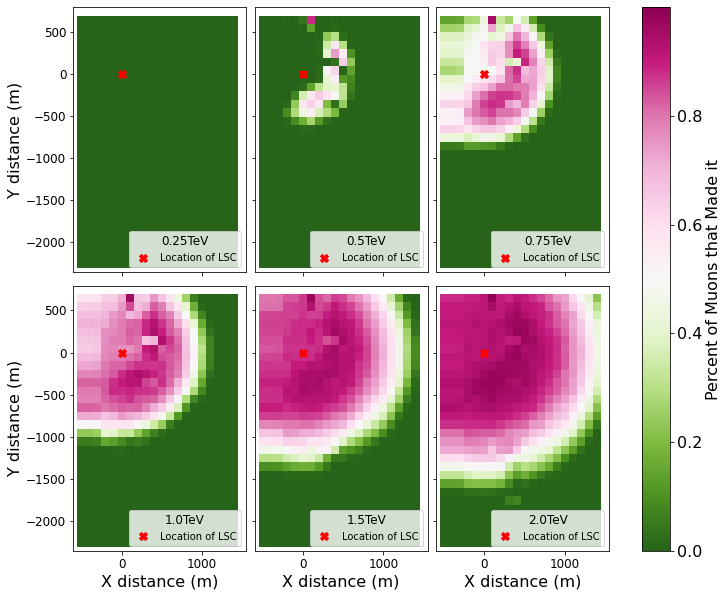

In [294]:
a=0

locs=[1,2,3,4,5,6]



spacing=100
NumToRun=1000
Xmin=-500-spacing
Xmax=1500+spacing/2
Ymin=-2255-spacing
Ymax=745+spacing/2

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,10), sharex=True, sharey=True)
cmap = plt.get_cmap('PiYG')
for ax in axes.flat:
    LOC=locs[a]
    


    NRG=energies[LOC]

    with open('./MCeQdataPlusProposal/ProposalInterpolators/Proposal_Muons_interpolator'+str(NRG)+'TeV.pkl', 'rb') as f:
        PercentMuons = pickle.load(f)

    intexs=[]
    inteys=[]
    intepercs=[]
    for X in range(-500,1500,spacing):
        for Y in range(-2255,745,spacing):
            intexs.append(X)
            inteys.append(Y)
            intepercs.append(PercentMuons(X,Y)[0][0])


    intepercs = np.array(intepercs)
    intepercs=intepercs.reshape(len(np.unique(intexs)), len(np.unique(inteys)))
            
    
    im=ax.pcolormesh(np.unique(intexs),np.unique(inteys),np.transpose(intepercs),cmap=cmap.reversed(),shading='auto',vmin=0, vmax=1)
    ax.set_ylim(Ymin,Ymax)
    ax.set_xlim(Xmin,Xmax)
    ax.tick_params(axis='both', which='major', labelsize=12)


    #ax.title("Energy ="+str(energies[LOC]*GeV/10**6)+"TeV")
    ax.plot([0],[0],'X',label='Location of LSC',color='red',markersize=8)
    ax.legend(loc='lower right',title=str(NRG/10**6)+'TeV',title_fontsize=12)
    

    if (LOC>3):
        ax.set_xlabel("X distance (m)",fontsize=16)
    if (LOC==1) or (LOC==4):        
        ax.set_ylabel("Y distance (m)",fontsize=16)
    a+=1
fig.subplots_adjust(wspace=.05, hspace=.05)

cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Percent of Muons that Made it')
cbar.set_ticks(np.arange(0, 1, 0.2))
cbar.set_label('Percent of Muons that Made it', fontsize=16)
cbar.ax.tick_params(labelsize=16)
#fig.clim(0,1)


#fig.savefig("/Users/rogerslc/PROPOSAL/PROPOSAL/SimulatedPercents.png",dpi=250,bbox_inches='tight')

#plt.show()






In [300]:
costhetas=[]
phis=[]
survfrac=[]
for i in range(0,len(intexs)):
    x=np.array(intexs).flatten()[i]
    y=np.array(inteys).flatten()[i]
    c=np.array(intepercs).flatten()[i]
    startMuon = (x,y)
    thMuon,phiMuon,depthMuon,distMuon=GetMuonInfo(startMuon)
    if(np.cos(thMuon)>0.4):
        survfrac.append(c)
        costhetas.append(np.cos(thMuon))
        phis.append(phiMuon)
maxcol=max(np.array(survfrac).flatten())

(-3.141592653589793, 3.141592653589793)

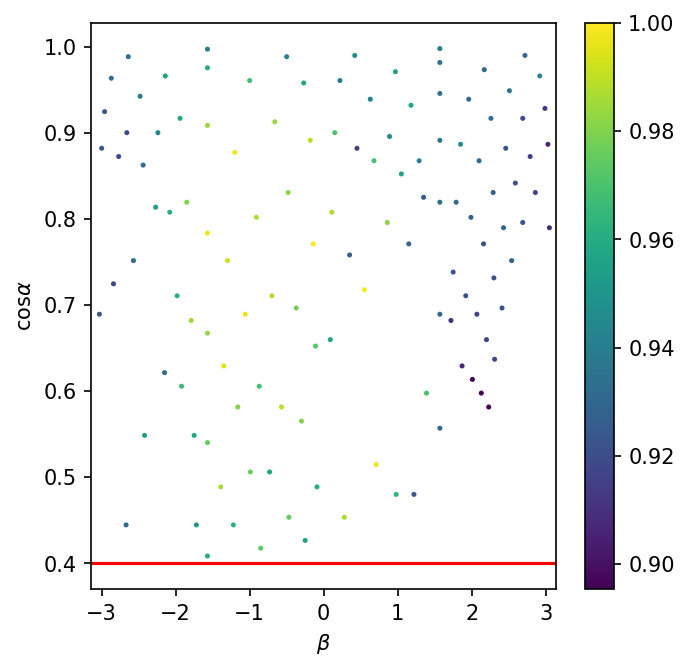

In [301]:
plt.figure(figsize=(5,5),dpi=150)
plt.scatter(phis,costhetas,c=(np.array(survfrac).flatten())/maxcol,s=2)
plt.colorbar()
plt.xlabel(r"$\beta$")
plt.ylabel(r"cos$\alpha$")
plt.plot([-np.pi,np.pi],[0.4,0.4],color='red')
plt.xlim(-np.pi,np.pi)

In [302]:
cosa_sample=np.linspace(0.4,1,50)
a_sample=np.arccos(cosa_sample)
b_sample=np.linspace(-np.pi,np.pi,100)
cosa_mesh,b_mesh=np.meshgrid(cosa_sample,b_sample)

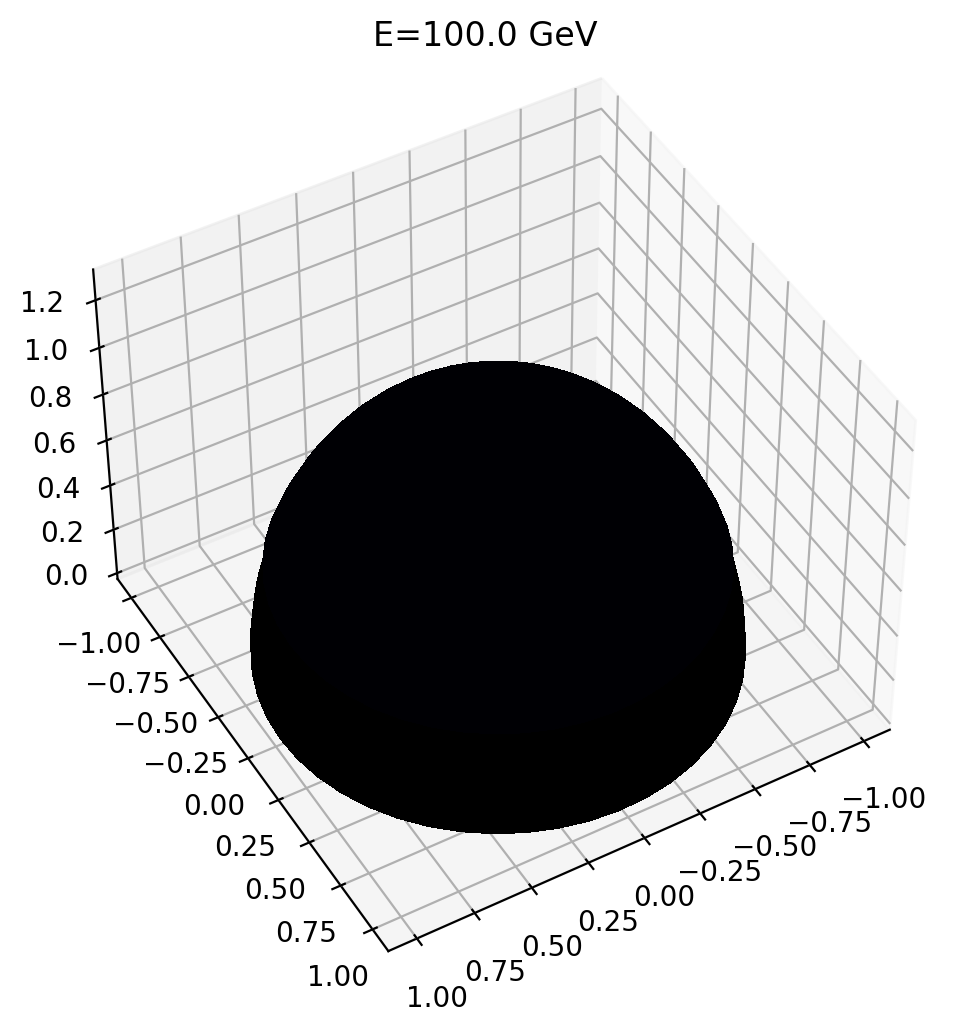

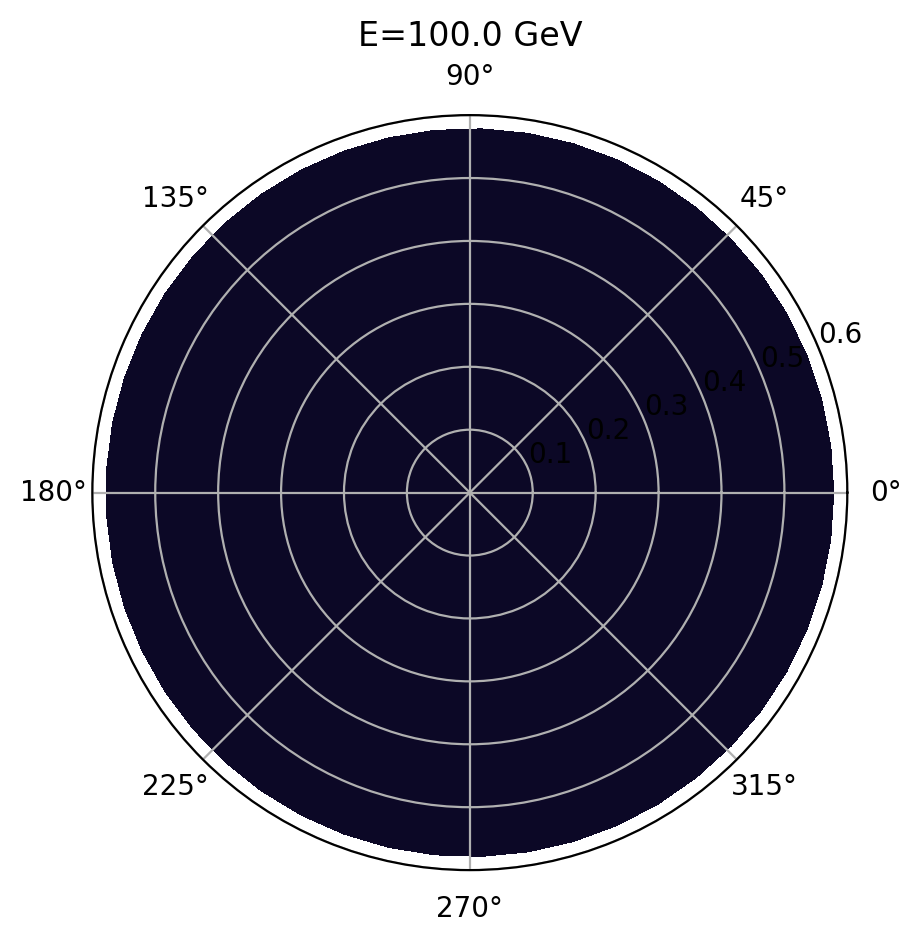

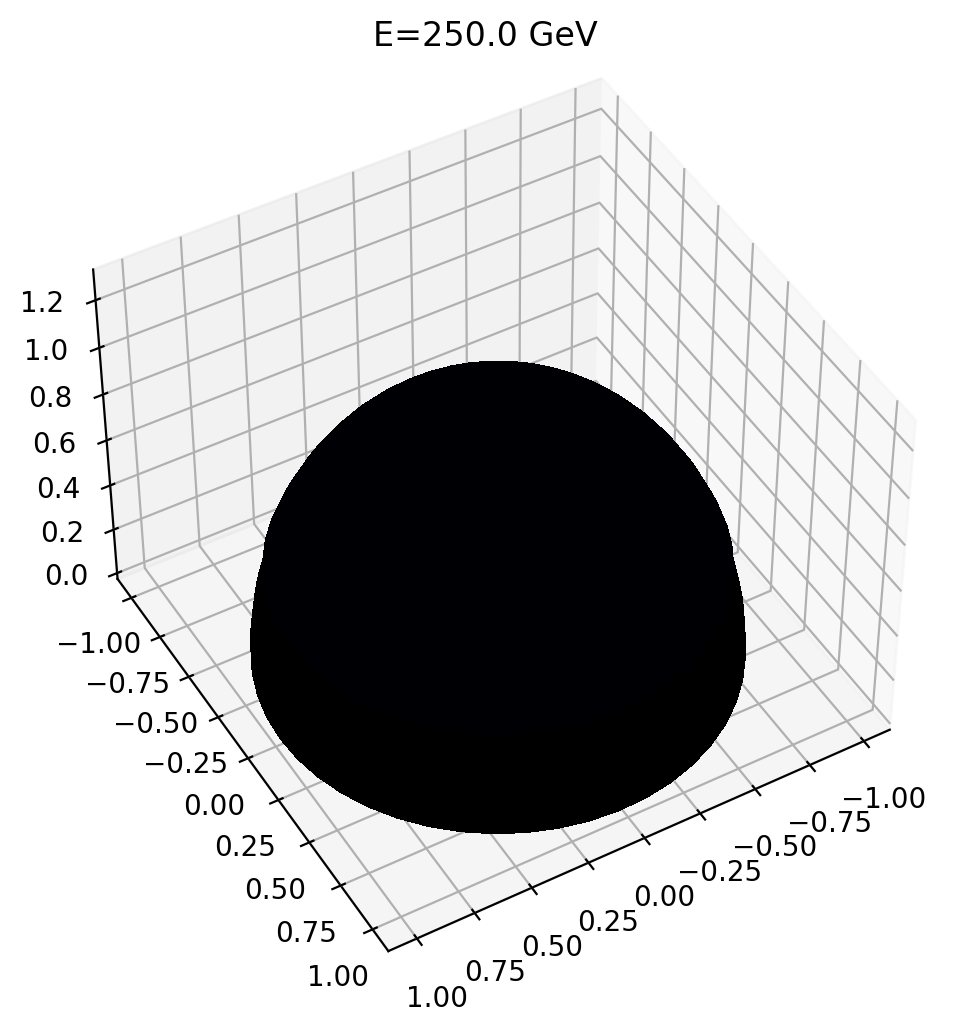

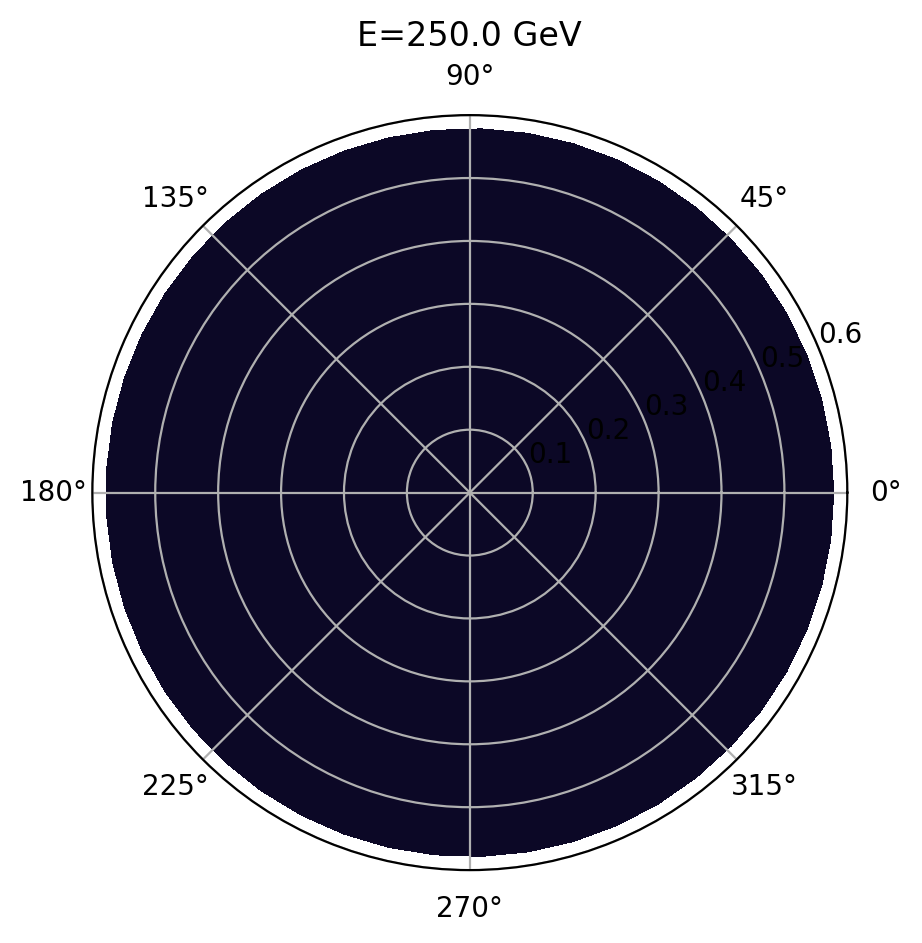

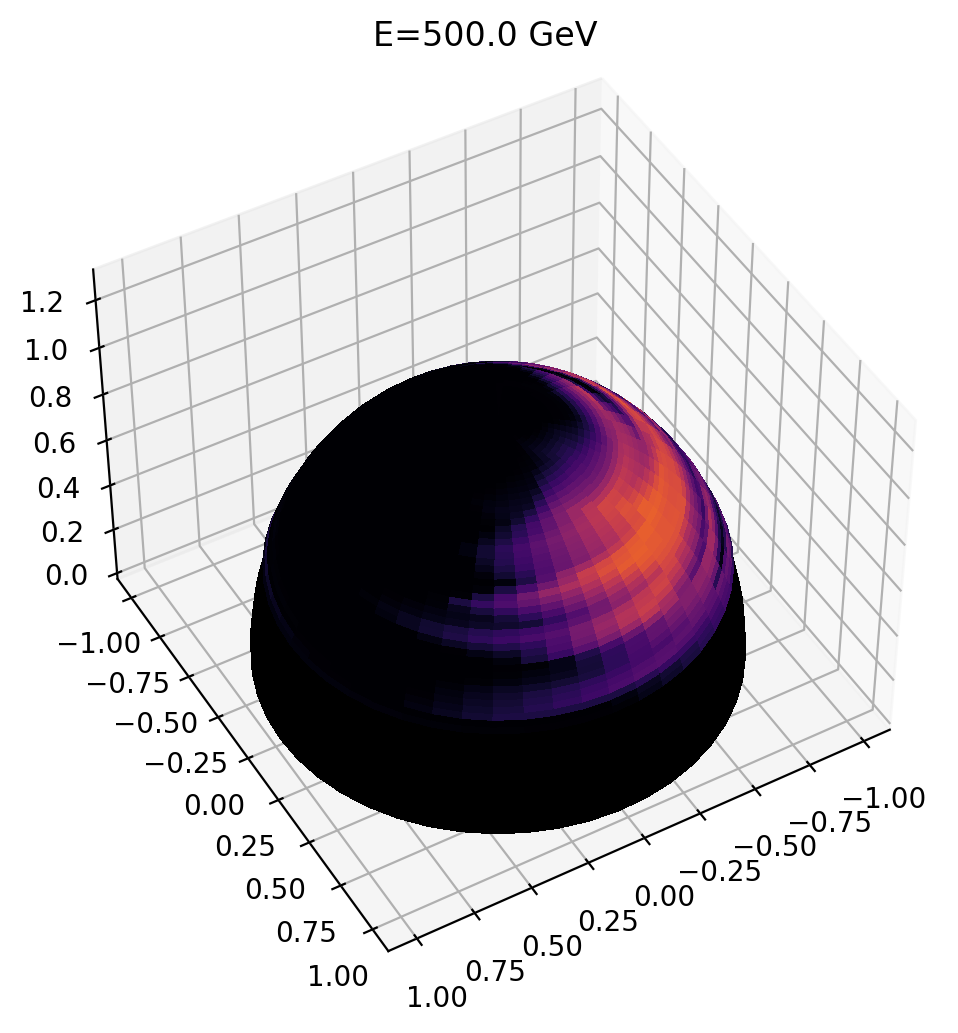

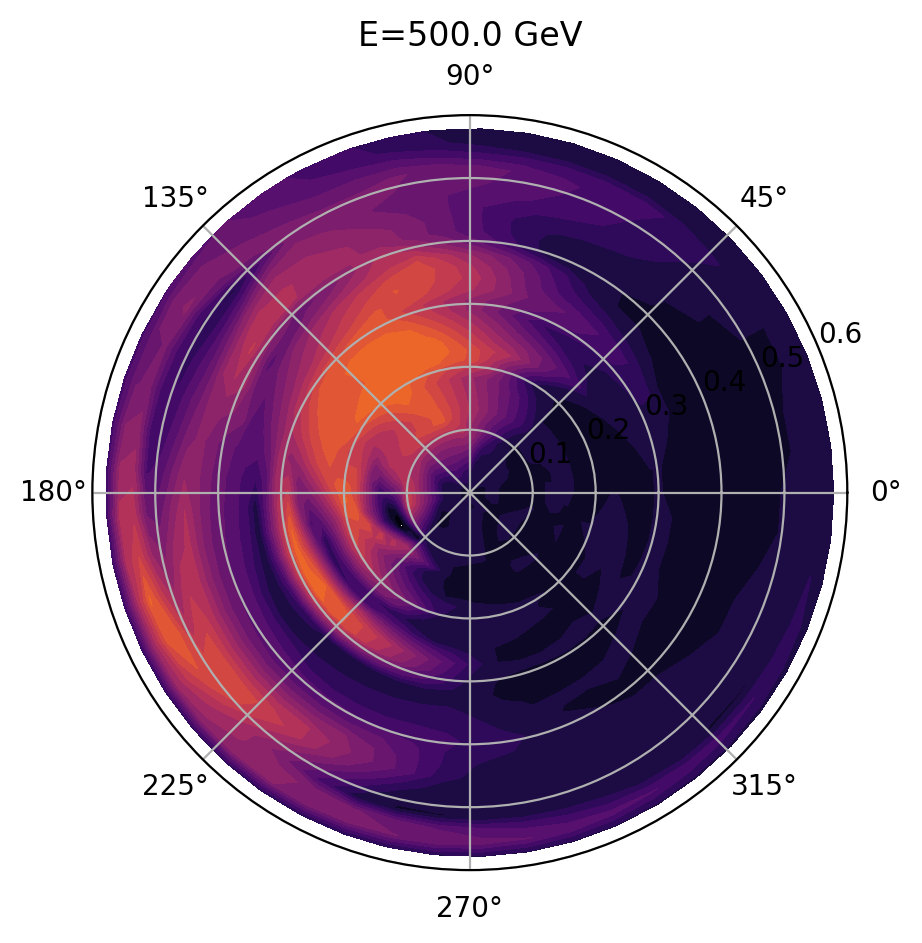

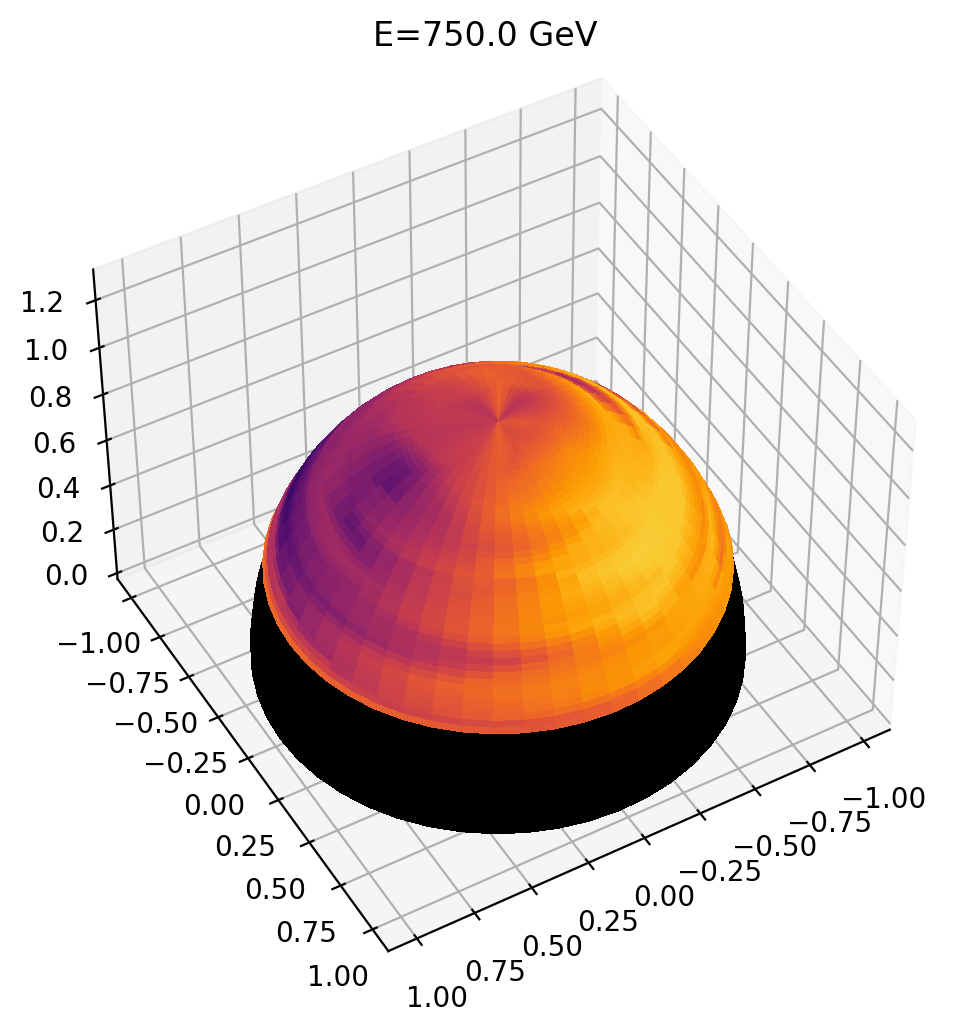

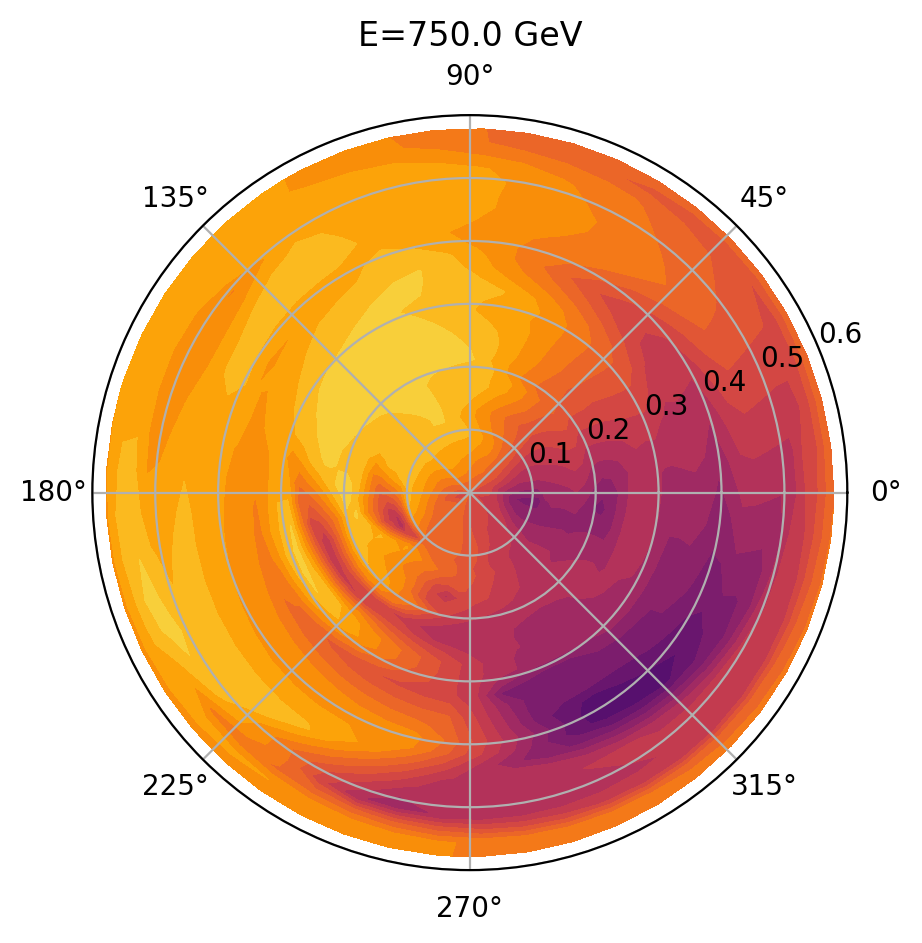

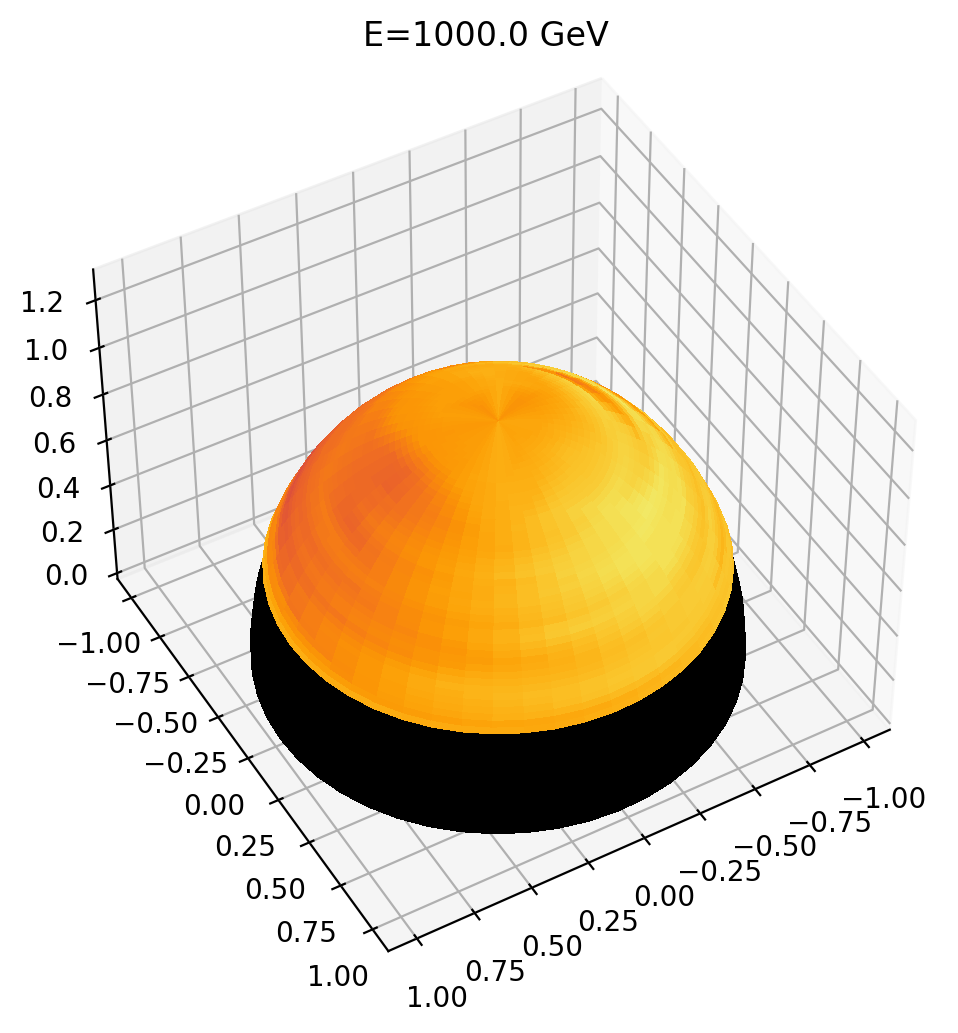

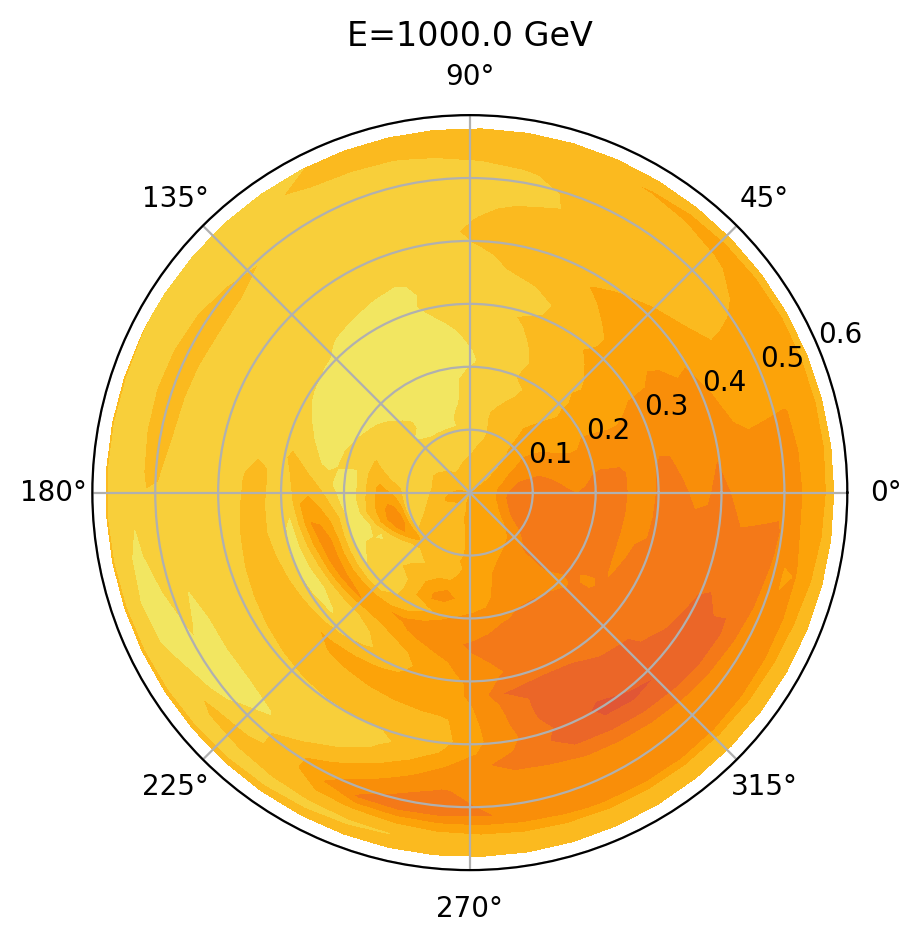

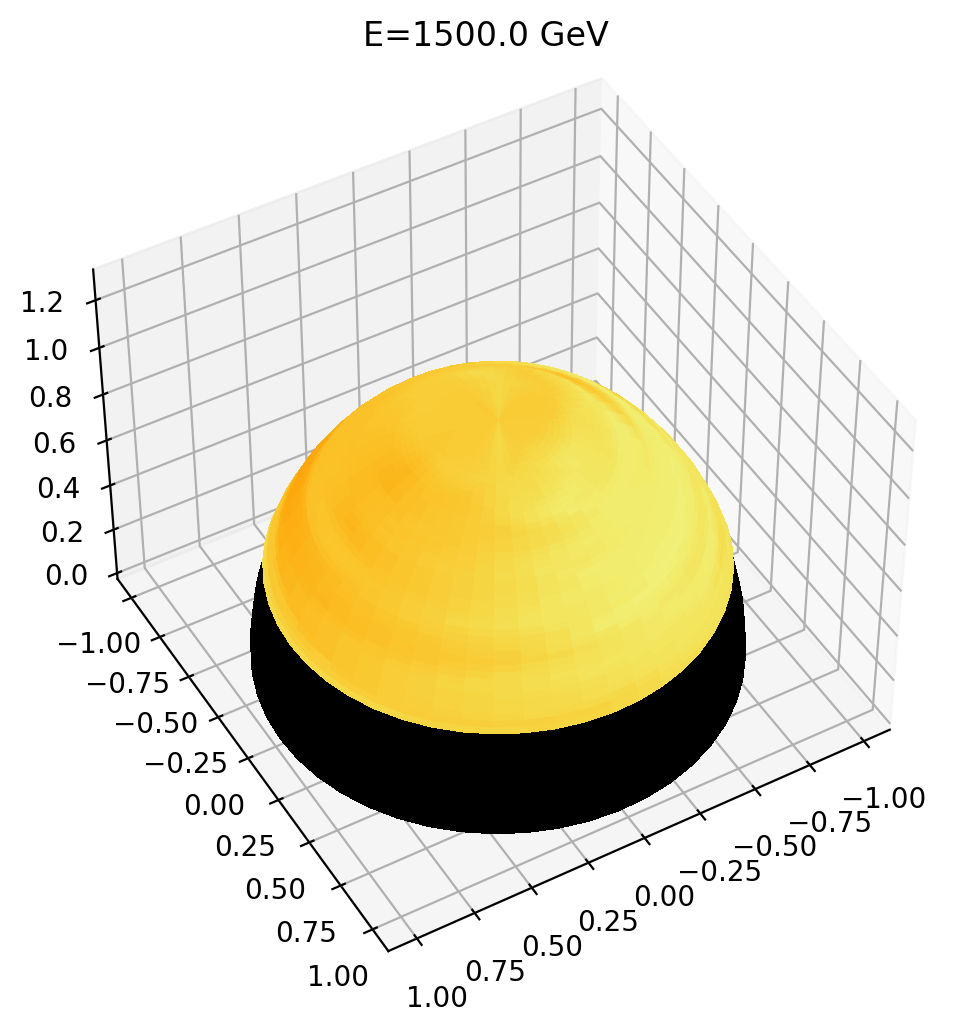

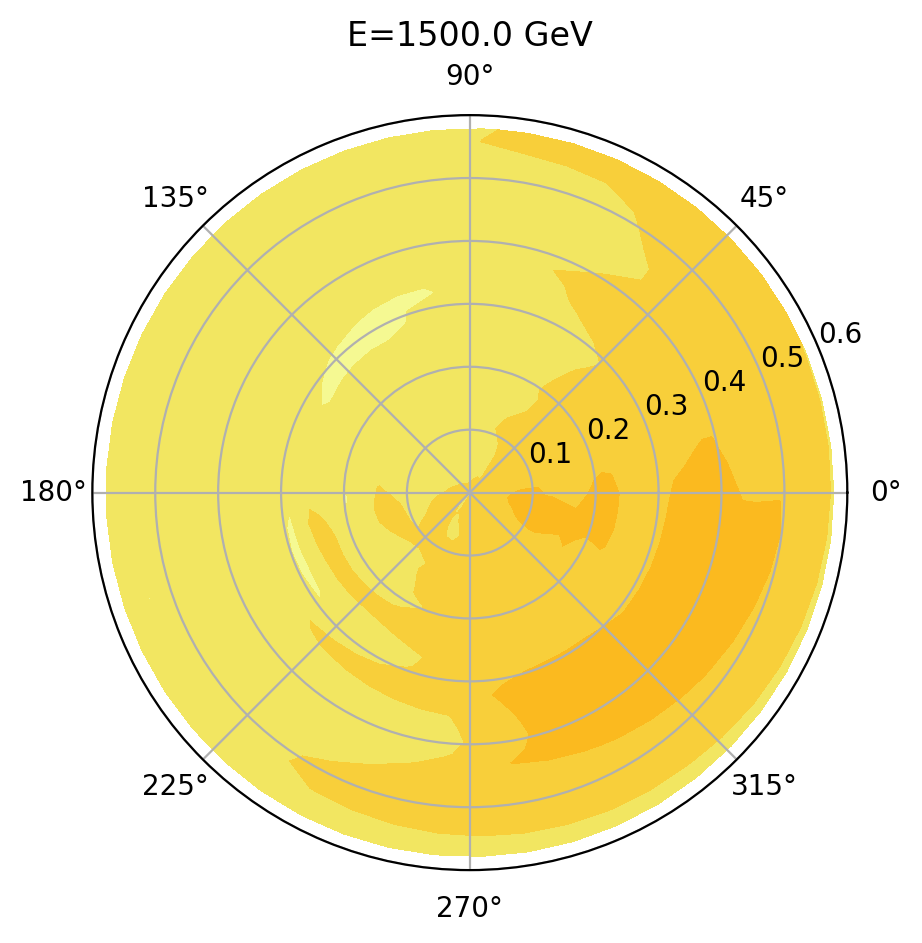

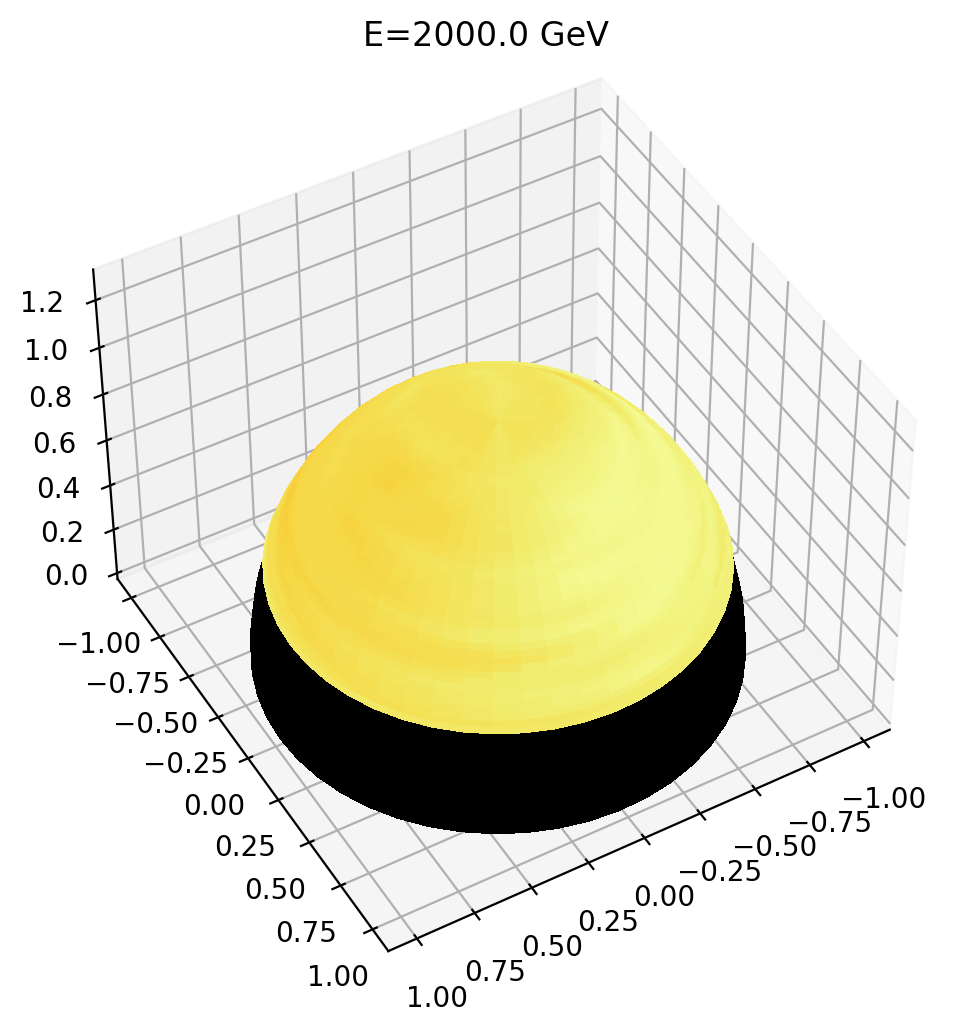

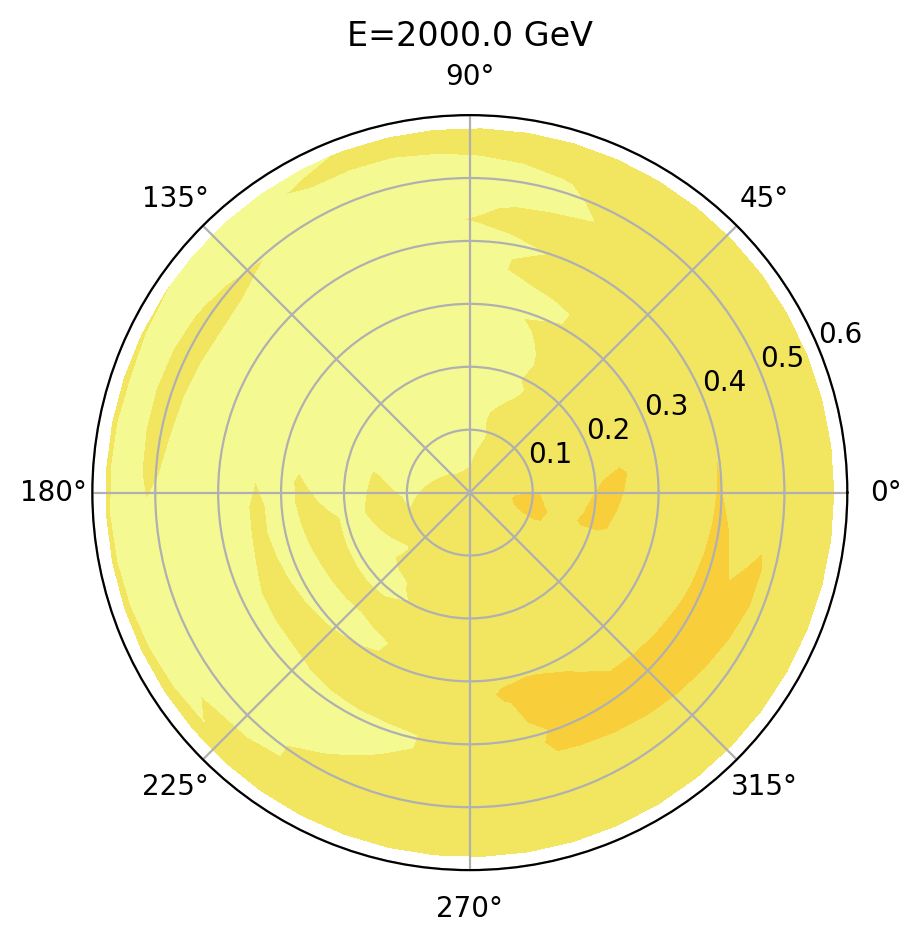

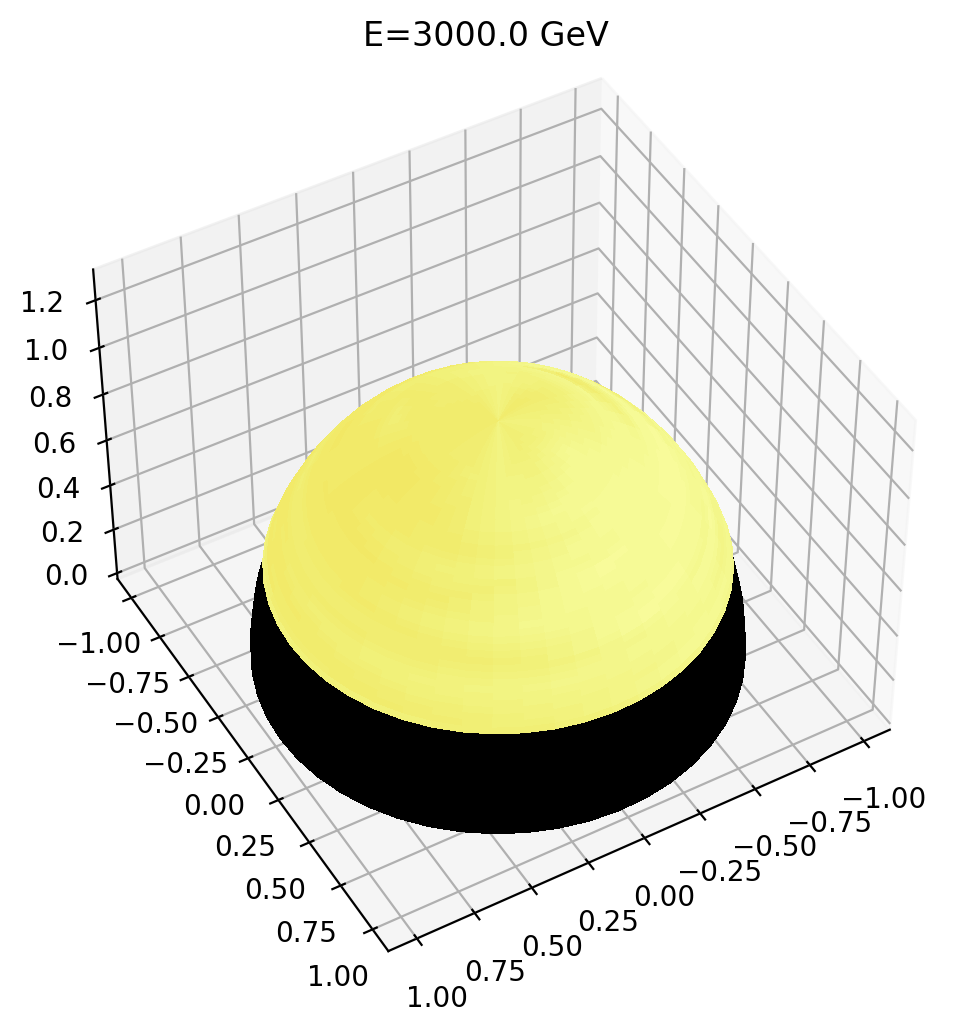

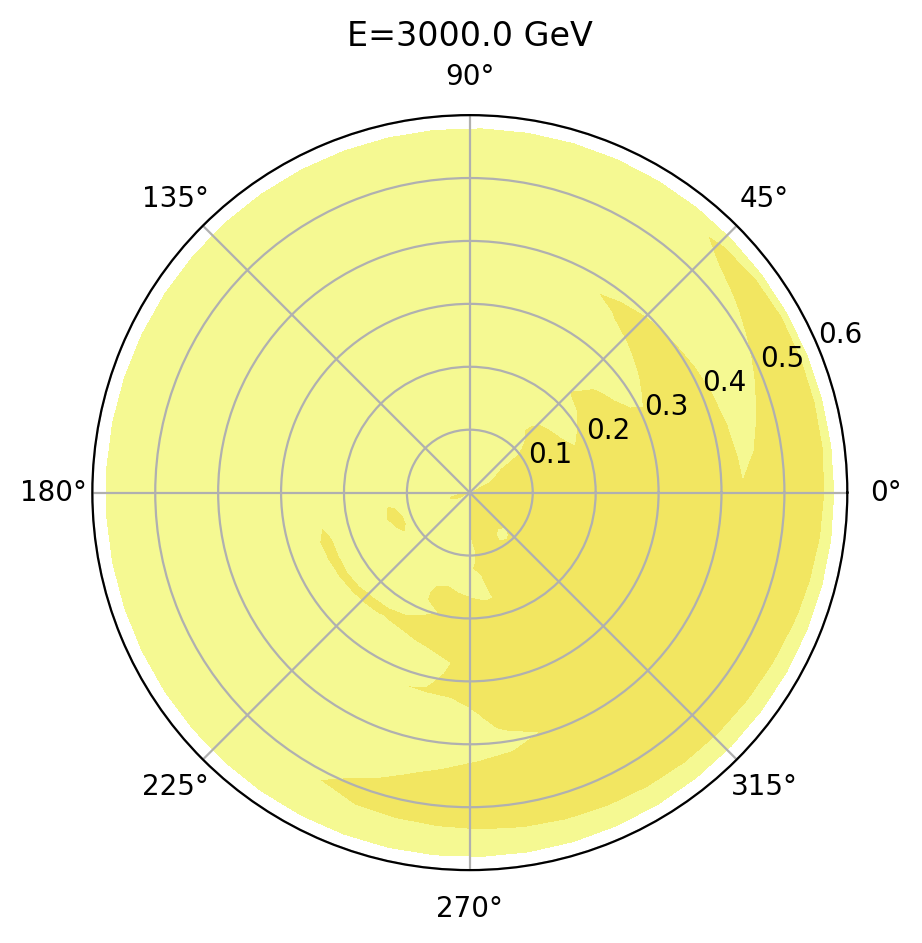

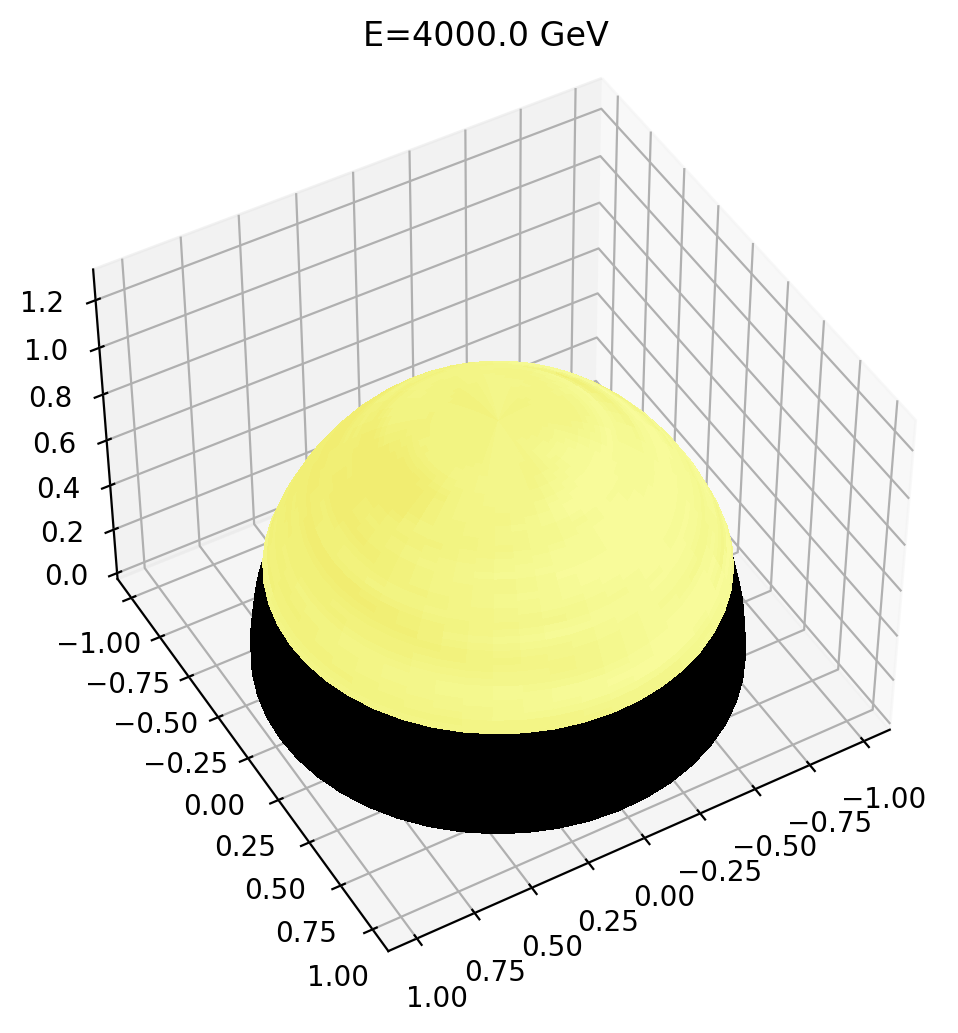

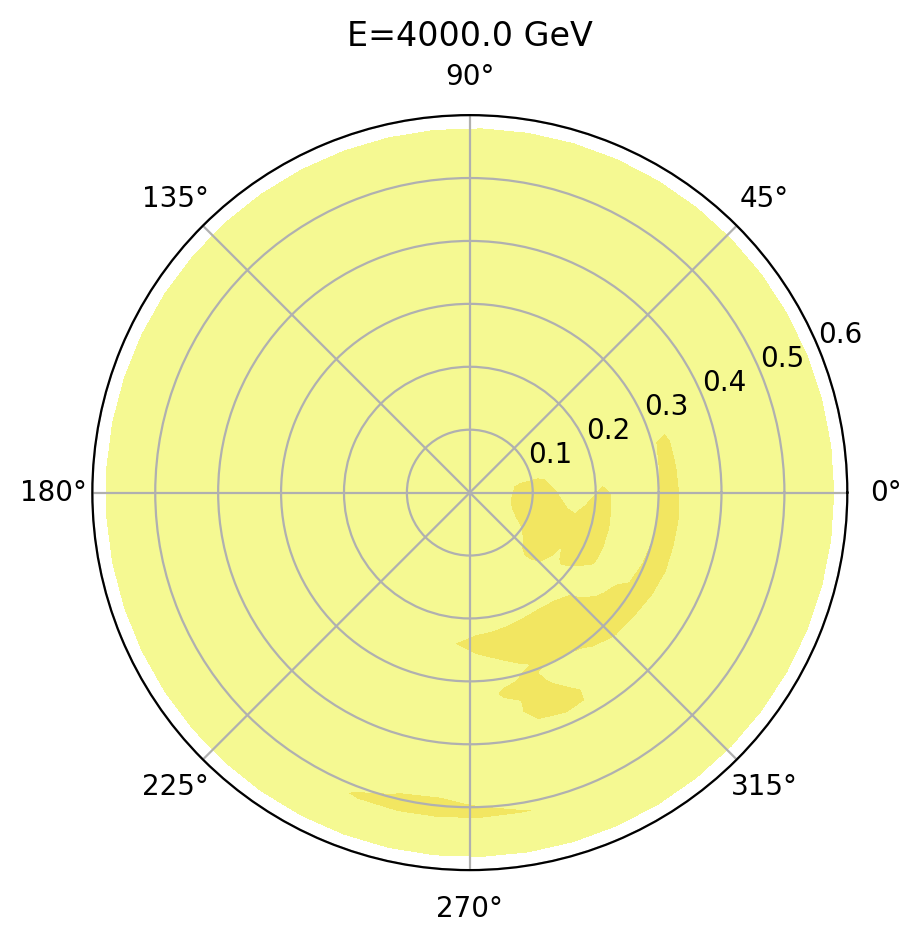

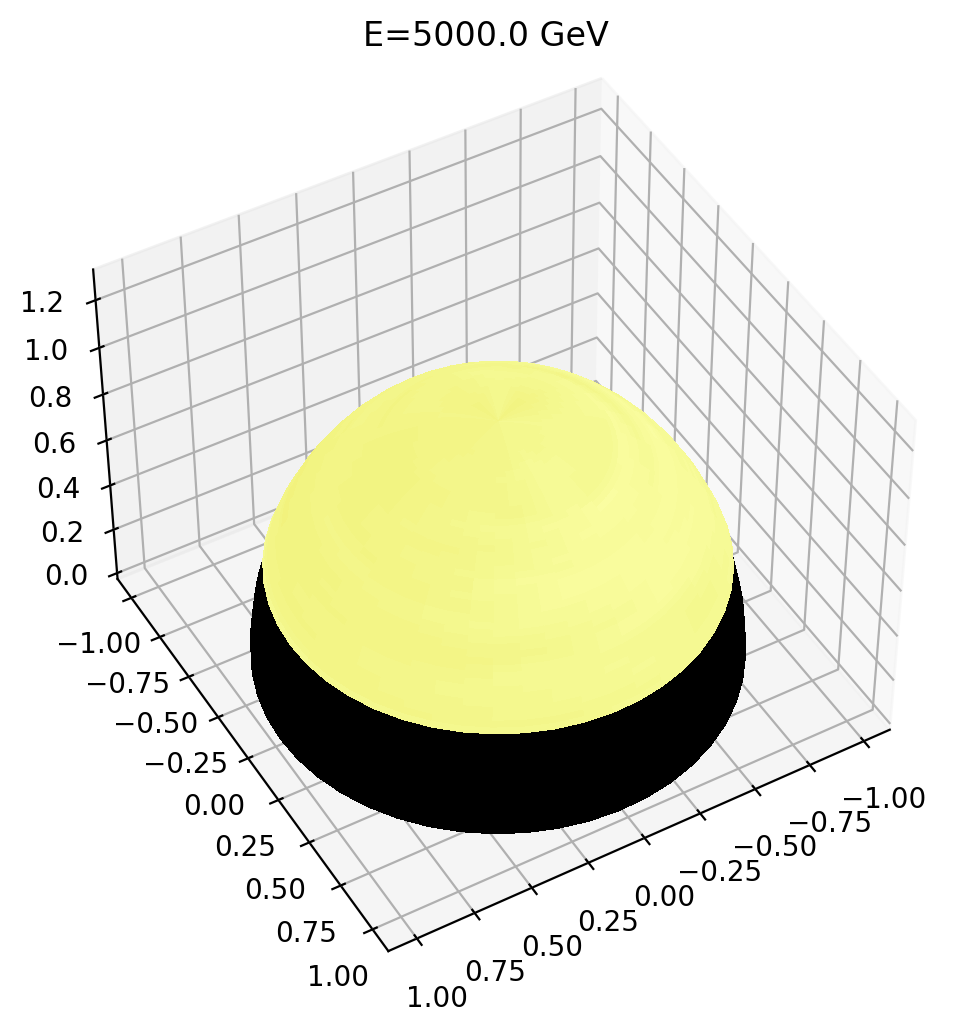

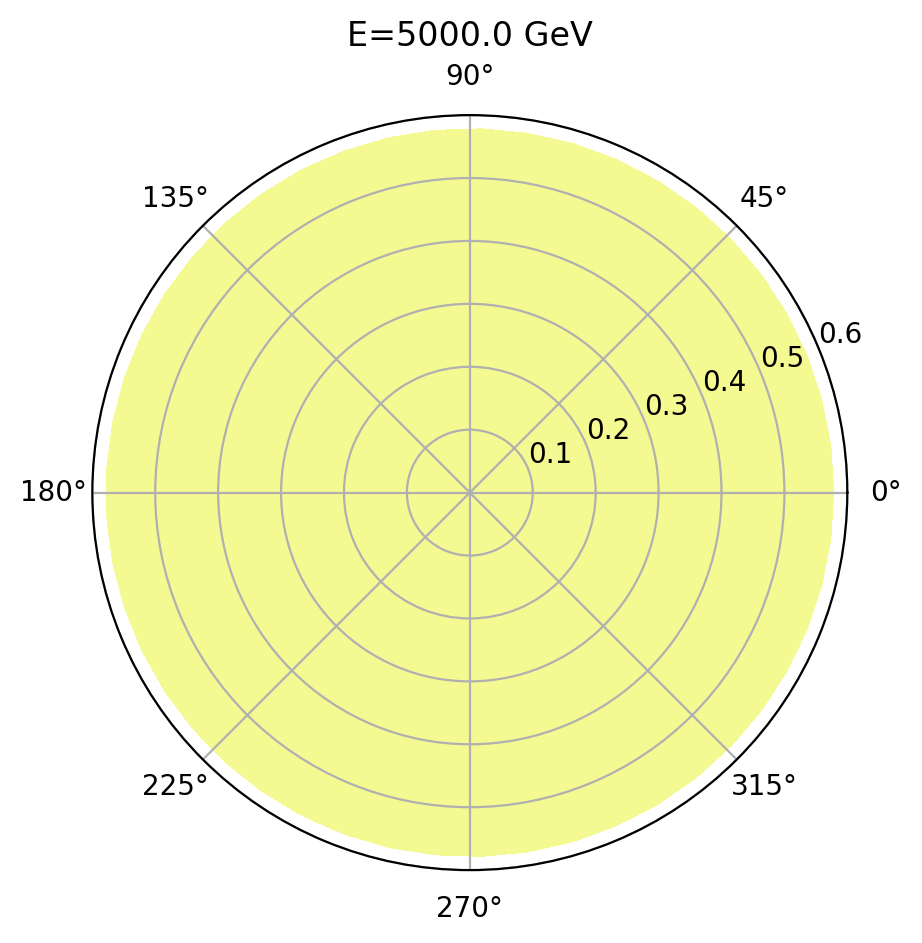

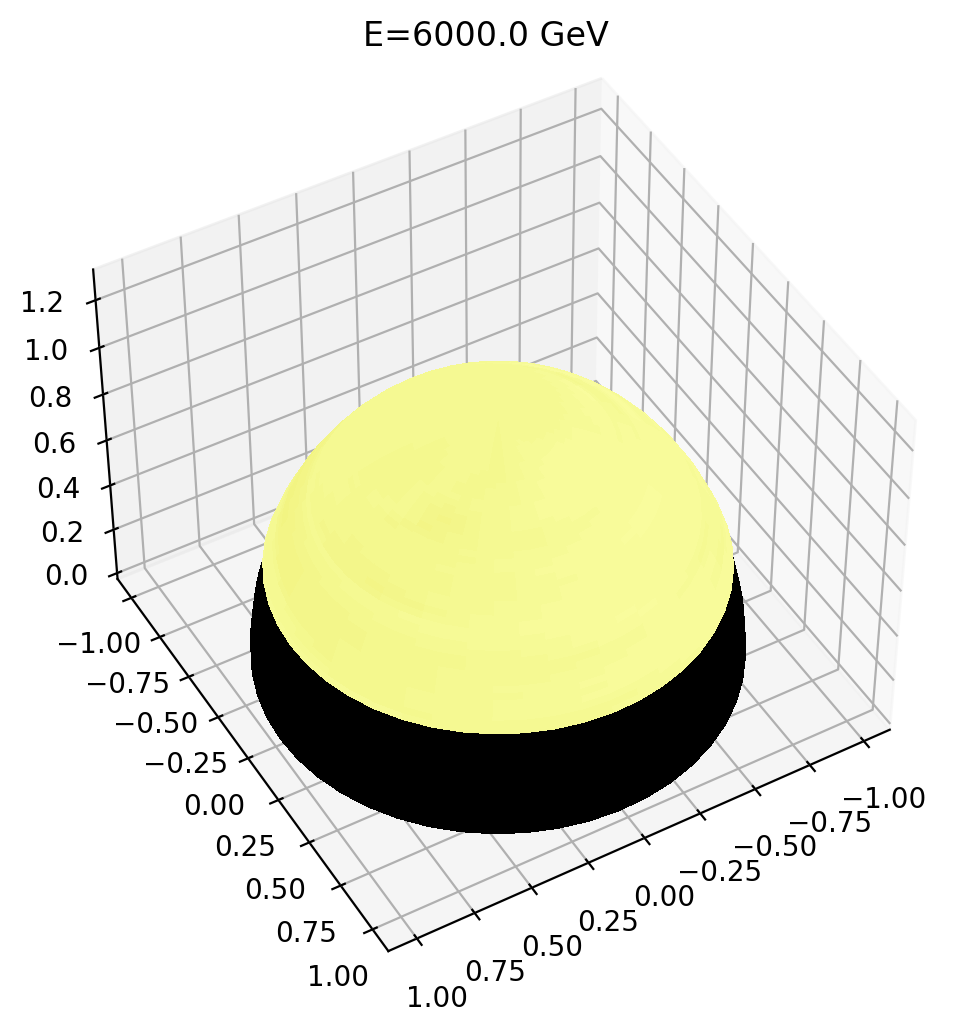

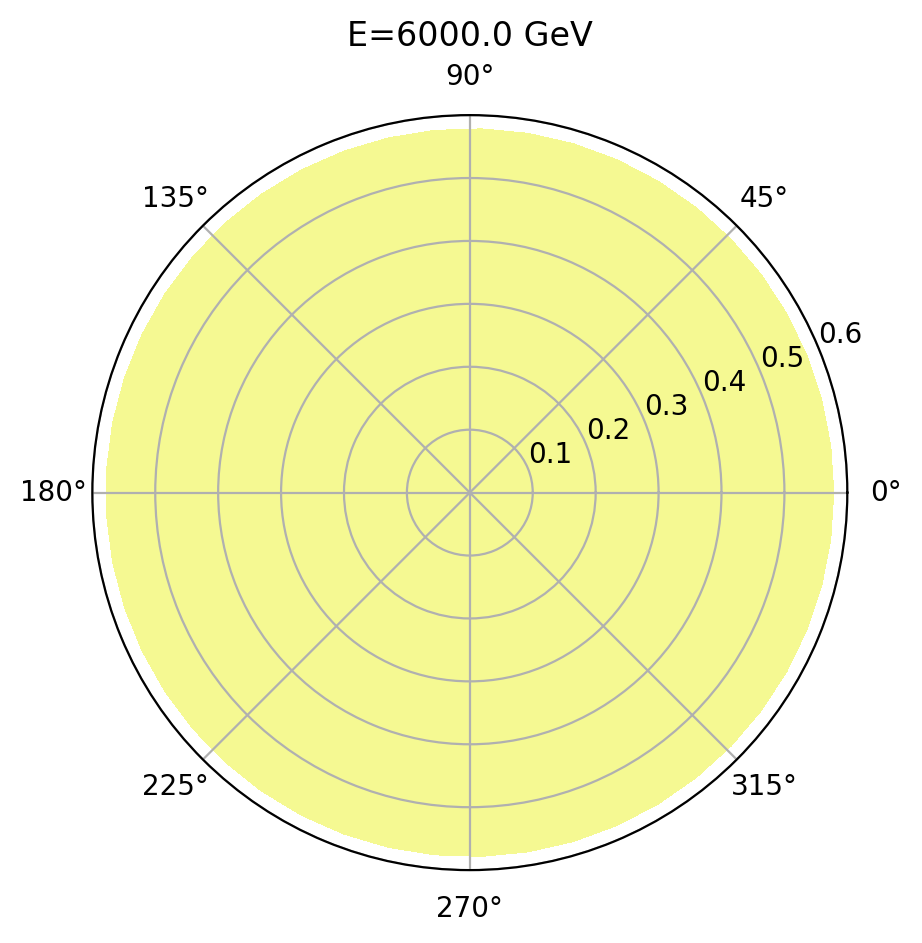

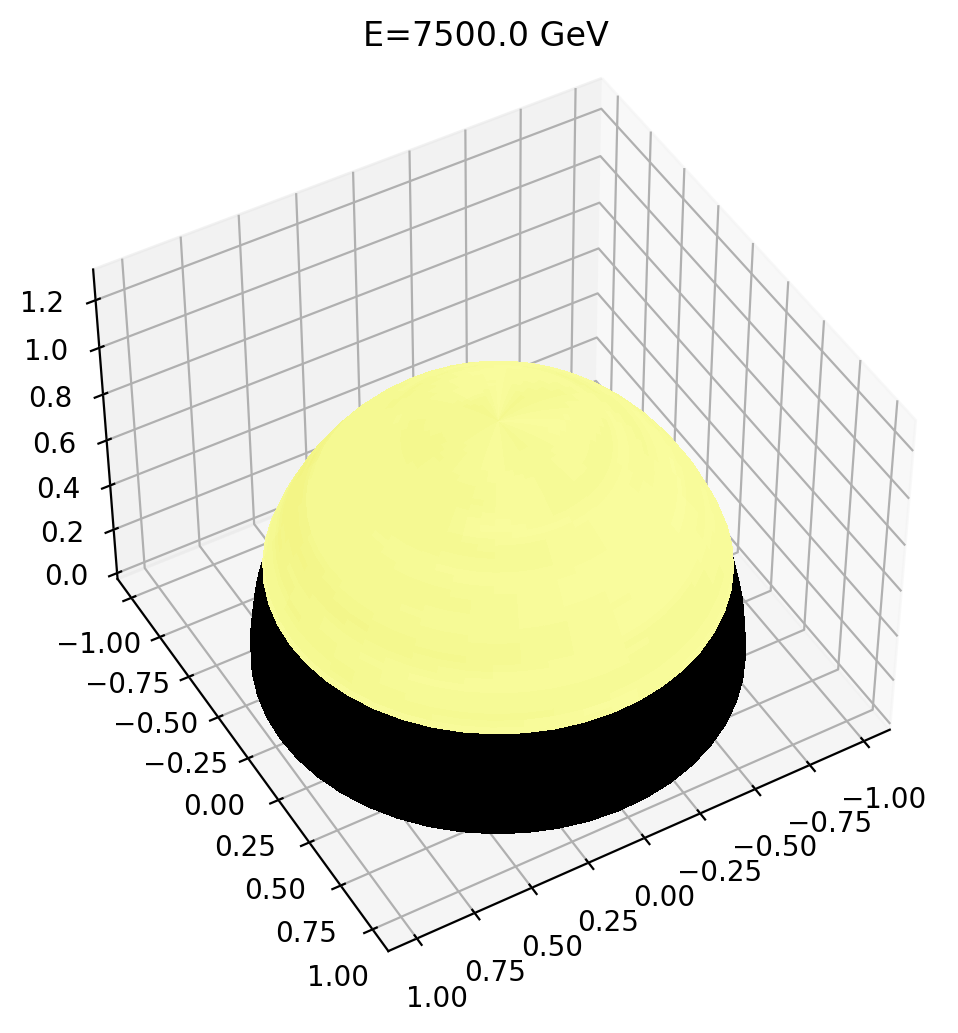

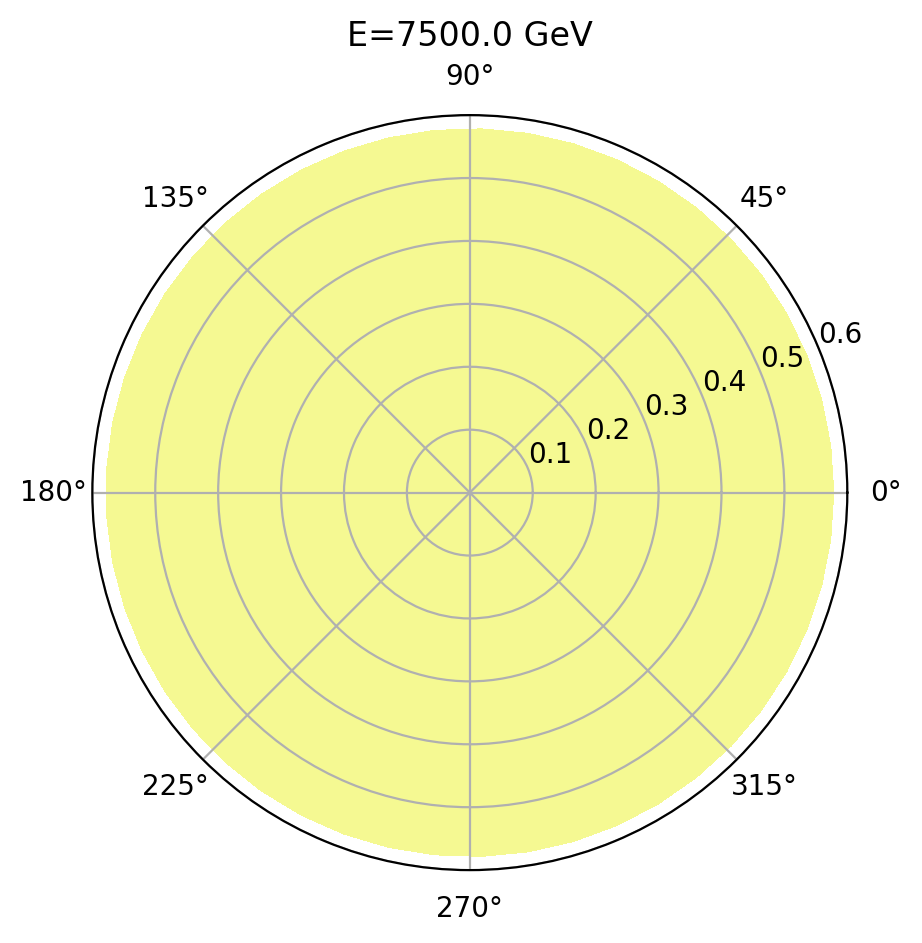

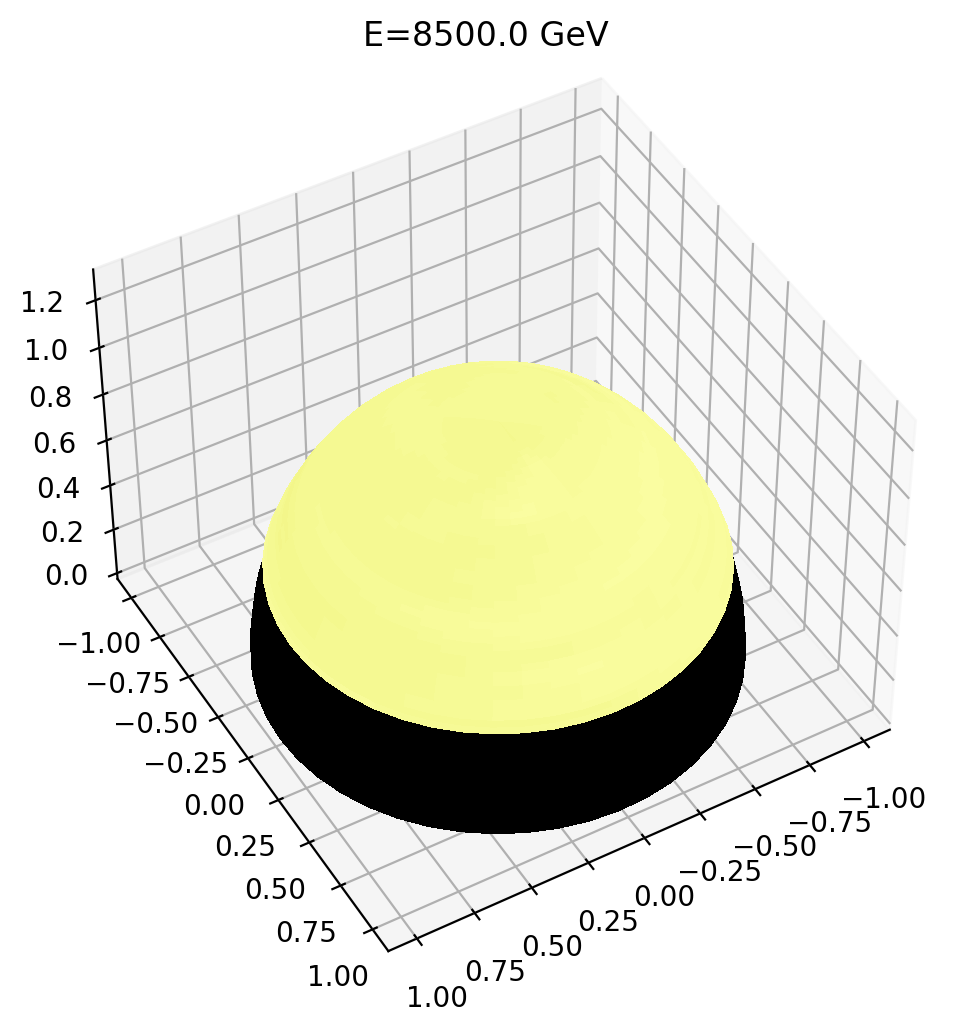

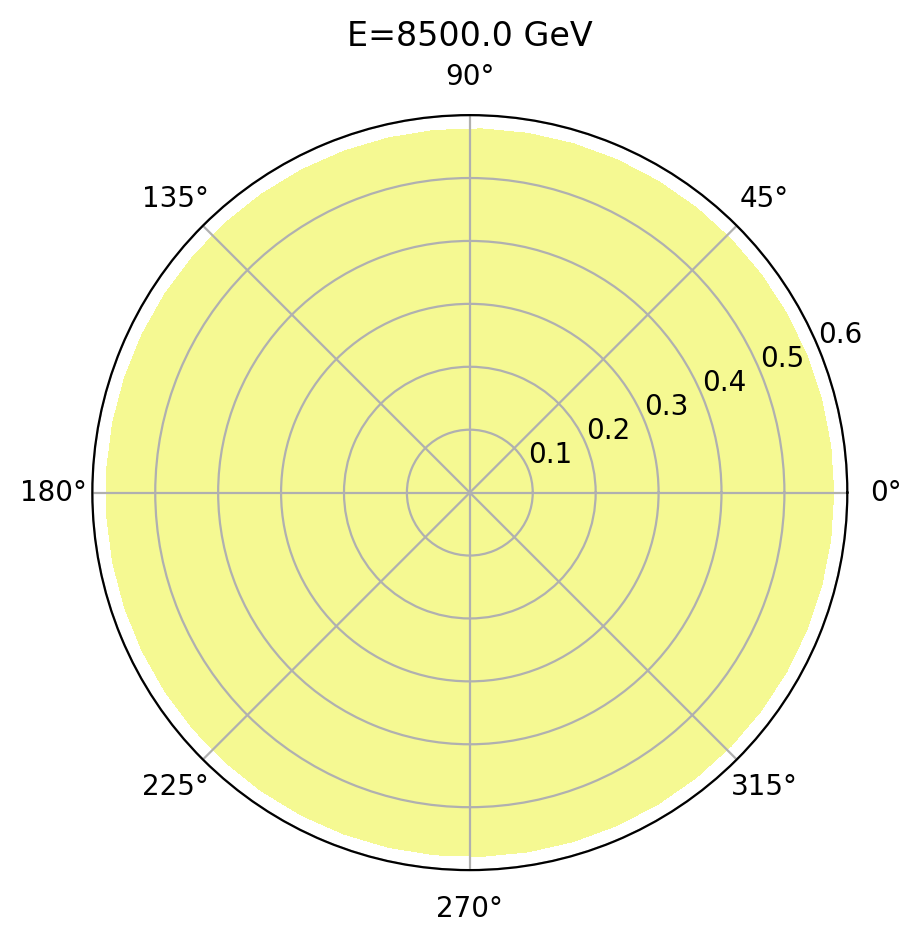

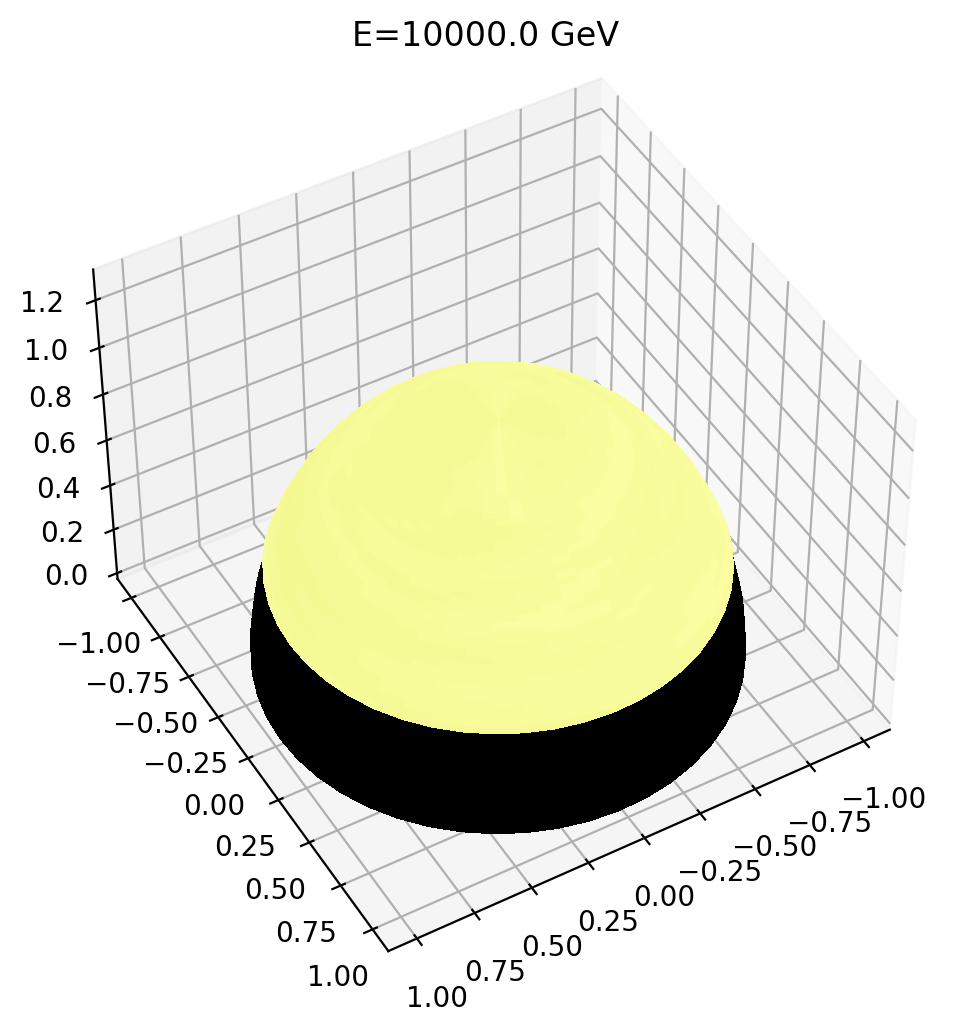

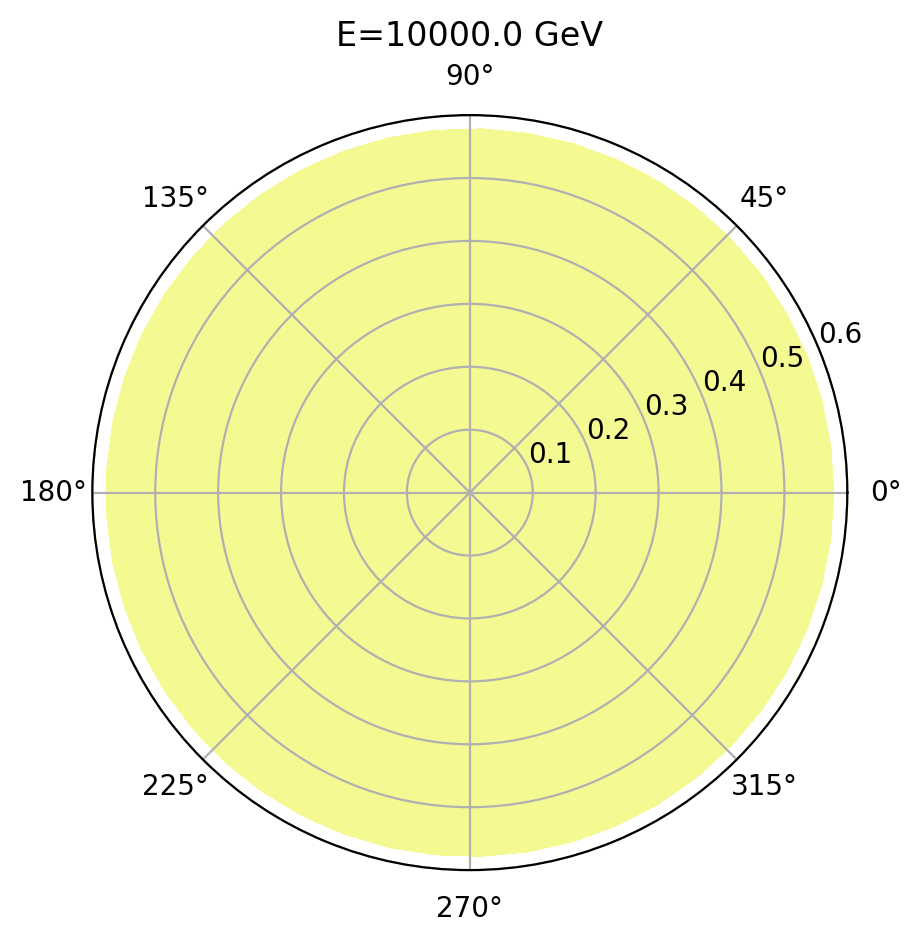

In [ ]:
ei=0
LinInterps={}
NDInterps={}
for energy in energies:
    with open('./MCeQdataPlusProposal/ProposalInterpolators/Proposal_Muons_interpolator'+str(energy)+'TeV.pkl', 'rb') as f:
        PercentMuons = pickle.load(f)
    ei+=1
    intexs=[]
    inteys=[]
    intepercs=[]
    for X in range(-500,1500,spacing):
        for Y in range(-2255,745,spacing):
            intexs.append(X)
            inteys.append(Y)
            intepercs.append(PercentMuons(X,Y)[0][0])


            
            
    intepercs = np.array(intepercs)
    intepercs=intepercs.reshape(len(np.unique(intexs)), len(np.unique(inteys)))

    costhetas=[]
    phis=[]
    survfrac=[]
    for i in range(0,len(intexs)):
        x=np.array(intexs).flatten()[i]
        y=np.array(inteys).flatten()[i]
        c=np.array(intepercs).flatten()[i]
        startMuon = (x,y)
        thMuon,phiMuon,depthMuon,distMuon=GetMuonInfo(startMuon)
        if(np.cos(thMuon)>0.4):
            survfrac.append(c)
            costhetas.append(np.cos(thMuon))
            phis.append(phiMuon)

    #Add shifted phis to satisfy periodic boundary condition
    costhetas=np.concatenate([costhetas,costhetas,costhetas,2-np.array(costhetas)])
    phis=np.concatenate([phis,np.array(phis)-2*np.pi,np.array(phis)+2*np.pi,phis])
    survfrac=np.concatenate([survfrac, survfrac, survfrac,survfrac])
    maxcol=max(np.array(survfrac).flatten())
    
    
    intereff_lin=LinearNDInterpolator(np.array([costhetas,phis]).transpose(),np.array(survfrac).flatten(),rescale=True)
    intereff_ND=NearestNDInterpolator(np.array([costhetas,phis]).transpose(),np.array(survfrac).flatten(),rescale=True)

    LinInterps[energy]=intereff_lin
    NDInterps[energy]=intereff_ND
    
    fig = plt.figure(figsize=(6,6),dpi=200)
    ax = fig.add_subplot(111, projection='3d')
    fig.patch.set_facecolor('white')
    u, v = np.mgrid[0:np.arccos(0.4):50j, 0:2*np.pi:50j]
    allu, allv = np.mgrid[0:np.pi/2:50j, 0:2*np.pi:50j]




    strength = np.zeros_like(u)
    for i in range(0,len(u)):
        for j in range(0,len(v)):
            strength[i,j]=intereff_lin(np.cos(u[i,j]),v[i,j]-np.pi)
    norm=colors.Normalize(vmin = 0,
                          vmax = 1, clip = False)

    x = 1 * np.sin(u) * np.cos(v)
    y = 1 * np.sin(u) * np.sin(v)
    z = 1 * np.cos(u)


    allx = 0.98 * np.sin(allu) * np.cos(allv)
    ally = 0.98 * np.sin(allu) * np.sin(allv)
    allz = 0.98 * np.cos(allu)

    ax.plot_surface(allx, ally, allz, rstride=1, cstride=1, cmap=cm.inferno,
                           linewidth=0, antialiased=False,
                           facecolors=cm.afmhot(np.zeros_like(norm(strength))))

    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.inferno, vmin=0, vmax=1,
                           linewidth=0, antialiased=False,
                           facecolors=cm.inferno(norm(strength)))
    plt.title("E="+str(energy/1000)+" GeV")
    ax.view_init(elev=45, azim=60)
    ax.set_zlim(0,1.3)


    plt.savefig("MushroomsLin/"+str(ei).zfill(2)+".png",dpi=200)
    plt.show()
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),figsize=(5,5),dpi=200)
    fig.patch.set_facecolor('white')


    levels=np.arange(-0.1,1.01,0.05)
    ax.contourf(v,1.-np.cos(u), norm(strength),cmap='inferno',levels=levels)
    plt.title("E="+str(energy/1000)+" GeV")
    plt.savefig("Radars/"+str(ei).zfill(2)+".png",dpi=200)
    plt.show()

    

In [322]:
levels

array([-0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05])

In [281]:
f=open("LinInterps.pkl",'wb')
pickle.dump(LinInterps,f)
f.close()
f=open("NDInterps.pkl",'wb')
pickle.dump(NDInterps,f)
f.close()

In [235]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, r, values)

plt.show()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])